In [16]:
import os
os.chdir(r'G:\Ext_Disk_SharedFolder\Career\Oracle\ADW Challenge - Candidate Pack')
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from pandasql import sqldf
msql = lambda q: sqldf(q, globals())

In [2]:
Sales = pd.read_excel('PCW15 F Sales.xlsx')

In [39]:
Sales.shape

(12932, 6)

In [3]:
Sales.head()

,Order #,Sales Date,Store Id,Item Id,Units,Revenue
0,Ord 0001,2012-08-01,1,3,52,5980.00
1,Ord 0002,2012-08-01,2,15,38,7211.26
2,Ord 0003,2012-08-01,3,36,40,35999.60
3,Ord 0004,2012-08-01,4,10,50,19950.00
4,Ord 0005,2012-08-01,5,10,20,7980.00


In [4]:
Sales['Item Id'].value_counts()

19    826
21    747
18    743
22    724
10    523
36    503
39    497
12    482
33    468
32    468
16    466
7     456
27    443
15    312
30    308
1     292
5     280
3     278
26    266
11    259
13    248
20    241
37    233
40    232
24    230
6     229
2     224
4     218
34    215
28    147
23    138
29    136
25    136
35    131
31    130
41    127
38    127
8     126
9     118
17    110
14     95
Name: Item Id, dtype: int64

In [5]:
Sales['Order #'].where(Sales['Order #'].value_counts()>1)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
12902    NaN
12903    NaN
12904    NaN
12905    NaN
12906    NaN
12907    NaN
12908    NaN
12909    NaN
12910    NaN
12911    NaN
12912    NaN
12913    NaN
12914    NaN
12915    NaN
12916    NaN
12917    NaN
12918    NaN
12919    NaN
12920    NaN
12921    NaN
12922    NaN
12923    NaN
12924    NaN
12925    NaN
12926    NaN
12927    NaN
12928    NaN
12929    NaN
12930    NaN
12931    NaN
Name: Order #, Length: 12932, dtype: object

In [6]:
pd.value_counts(Sales['Order #']).sum()

12932

In [7]:
Sales['Store Id'].value_counts()

4     1081
3     1081
2     1081
5     1080
12    1079
10    1079
1     1079
6     1078
9     1075
7     1073
11    1073
8     1073
Name: Store Id, dtype: int64

In [8]:
Sales.shape

(12932, 6)

## Start Anlytics

In [9]:
Sales.head()

,Order #,Sales Date,Store Id,Item Id,Units,Revenue
0,Ord 0001,2012-08-01,1,3,52,5980.00
1,Ord 0002,2012-08-01,2,15,38,7211.26
2,Ord 0003,2012-08-01,3,36,40,35999.60
3,Ord 0004,2012-08-01,4,10,50,19950.00
4,Ord 0005,2012-08-01,5,10,20,7980.00


In [10]:
Sales['Revenue'].mean()

43042.8685044851

In [11]:
salavg = Sales.groupby('Store Id').agg({'Revenue': [np.sum, np.mean]})
salavg

Revenue              
                  sum          mean
Store Id                           
1         57002437.13  52828.950074
2         57104709.15  52825.817900
3         48089704.70  44486.313321
4         48557512.07  44919.067595
5         47122713.90  43632.142500
6         40572302.19  37636.643961
7         39638922.82  36942.146151
8         41052506.45  38259.558667
9         40228118.51  37421.505591
10        40650113.31  37673.877025
11        38751771.94  36115.351295
12        57859563.33  53623.320973

In [12]:
salavg.columns

MultiIndex(levels=[['Revenue'], ['sum', 'mean']],
           codes=[[0, 0], [0, 1]])

Stores having revenue < avg

In [13]:
salavg[salavg.iloc[:, 1]< Sales['Revenue'].mean()]

Revenue              
                  sum          mean
Store Id                           
6         40572302.19  37636.643961
7         39638922.82  36942.146151
8         41052506.45  38259.558667
9         40228118.51  37421.505591
10        40650113.31  37673.877025
11        38751771.94  36115.351295

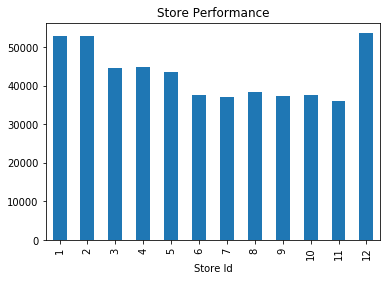

In [20]:
salavg.iloc[:, 1].plot(kind= 'bar')
plt.title('Store Performance')
plt.show()

Let's see if there is a difference between items revenu on each store

In [ ]:
# Bring item name:
salesn = Sales

In [25]:
rev_str_itm = Sales.groupby(['Store Id', 'Item Id']).agg({'Revenue': [np.mean]})
rev_str_itm.columns

MultiIndex(levels=[['Revenue'], ['mean']],
           codes=[[0], [0]])

In [34]:
rev_str_itm1 = rev_str_itm.unstack()
rev_str_itm1.columns = rev_str_itm1.columns.droplevel([0,1])
rev_str_itm1

Item Id,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
Store Id,,,,,,,,,,,,,,,,,,,,,
1,31114.173913,79860.161538,7566.041667,17589.529412,8334.782609,31226.515385,78284.150250,66107.438182,202925.865714,30407.511628,...,48103.548387,8290.590909,18317.477273,14649.186111,45826.021429,25112.780000,82540.800000,47358.096750,46478.894348,48957.729000
2,31135.000000,65360.353158,7135.000000,14530.928571,8988.000000,26059.406250,80781.732188,76598.085000,175947.654000,28462.000000,...,59262.666667,9089.707317,17564.545263,15581.991429,54470.823333,31179.045652,56736.000000,46926.384468,47806.222941,49125.135455
3,26646.592593,49076.076923,8503.235294,14448.000000,8777.777778,18862.115625,79712.375625,62631.767500,148873.015000,28184.680851,...,49190.068966,8818.733333,13794.763529,12764.290833,45278.068333,22071.170000,56160.000000,43145.882273,35869.557000,32305.116250
4,27896.047619,61704.491667,7144.375000,13495.384615,10878.260870,25242.790000,59106.253636,79031.357500,152122.971667,26464.285714,...,53980.750000,8871.240000,14256.118333,13463.252000,47029.710000,16843.711111,52625.454545,39333.654865,38533.152273,47571.334167
5,24992.529412,45625.880000,6149.761905,14801.347826,10506.250000,18272.450000,72624.153243,80317.992000,111921.584615,27495.471698,...,44166.847826,9063.512195,12652.846667,8819.510000,47140.016757,20624.022222,64896.000000,35096.717805,44388.148235,46142.606667
6,25127.541667,47133.854000,5136.666667,8871.681818,6420.000000,14789.043750,62757.141569,71598.210000,83044.347273,26307.400000,...,37468.733333,7723.323529,7461.713000,10055.441333,38150.795610,19085.886111,54432.000000,43183.109091,36615.540000,40367.221429
7,29544.035714,55430.472857,5621.470588,10524.882353,7650.000000,16767.383333,60672.008286,45498.862500,86165.517778,33013.083333,...,39581.500000,7238.025641,10823.794211,13473.537143,41594.132432,15290.144737,50169.600000,35665.064524,35570.803125,32883.410714
8,22865.947368,43631.065909,8140.357143,9629.470588,8073.529412,14996.914286,47283.684750,81331.300000,136048.186000,22239.000000,...,40806.093750,8338.069767,12050.536500,8129.548333,43039.521778,18258.835294,46921.846154,38204.776757,23916.719444,22965.471667
9,26345.000000,53666.133529,9416.730769,9675.000000,11085.000000,17342.071875,70178.790000,74664.800000,132164.904444,26054.700000,...,33354.975000,8398.868421,8604.430952,9707.460667,41340.845000,15680.094737,39744.000000,37707.664583,29584.295000,32638.486000


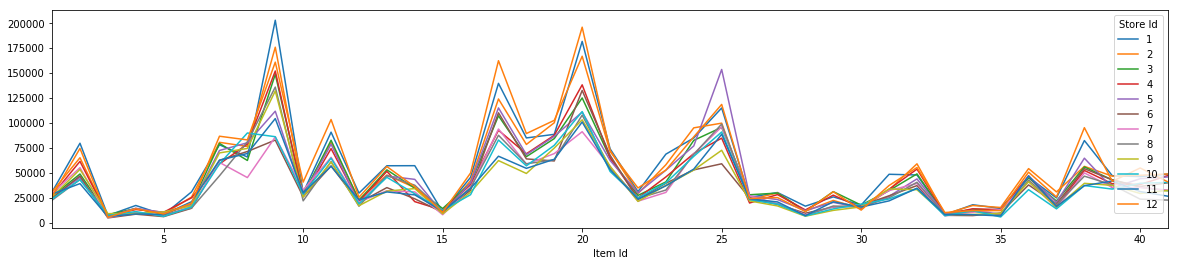

In [38]:
rev_str_itm1.transpose().plot(kind= 'line', figsize= (20,4))


### Sales Volumn

In [44]:
print msql("SELECT * FROM Sales;").head()

SyntaxError: invalid syntax (<ipython-input-44-abb34244354c>, line 1)